In [1]:
import pandas as pd

# O pandas vai procurar este arquivo na mesma pasta onde o .ipynb está salvo
df = pd.read_csv('salario_profissionais_dados.csv')

# Exibe as primeiras 5 linhas para confirmar que funcionou
df.head()


,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847.0,ES,ES,L,8.0
1,2023,United States of America,Americas,MI,ML Engineer,30000.0,US,US,S,5.0
2,2023,United States of America,Americas,MI,ML Engineer,25500.0,US,US,S,3.0
3,2023,Canada,Americas,SE,Data Scientist,175000.0,CA,CA,M,8.0
4,2023,Canada,Americas,SE,Data Scientist,120000.0,CA,CA,M,8.0


In [2]:
# 1. Cargos mais comuns (Mostra os 10 cargos com mais profissionais na base)
print("--- Top 10 Cargos mais Comuns ---")
print(df['job_title'].value_counts().head(10))

# 2. Distribuição por Nível de Experiência (Frequência Relativa em %)
# Isso ajuda a entender se a maioria é Junior (EN), Pleno (MI), etc.
print("\n--- Distribuição por Nível de Experiência (%) ---")
print(df['experience_level'].value_counts(normalize=True) * 100)

# 3. Tamanho das Empresas (S, M, L)
print("\n--- Frequência por Tamanho de Empresa ---")
print(df['company_size'].value_counts())

--- Top 10 Cargos mais Comuns ---
job_title
Data Engineer                1037
Data Scientist                836
Data Analyst                  612
Machine Learning Engineer     285
Analytics Engineer            102
Data Architect                101
Research Scientist             80
Applied Scientist              58
Data Science Manager           58
Research Engineer              37
Name: count, dtype: int64

--- Distribuição por Nível de Experiência (%) ---
experience_level
SE    67.255689
MI    21.258367
EN     8.460509
EX     3.025435
Name: proportion, dtype: float64

--- Frequência por Tamanho de Empresa ---
company_size
M    3148
L     442
S     145
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Cargos'}, xlabel='job_title'>

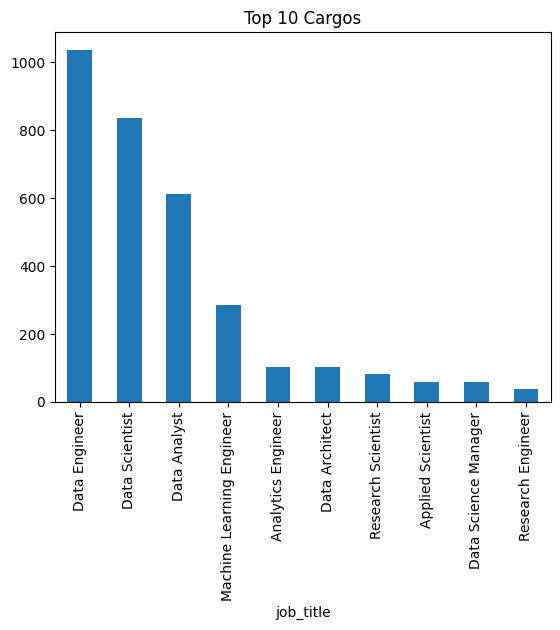

In [8]:
df['job_title'].value_counts().head(10).plot(kind='bar', title='Top 10 Cargos')

Matplotlib is building the font cache; this may take a moment.


Cargos mais comuns:
job_title
Data Engineer                1037
Data Scientist                836
Data Analyst                  612
Machine Learning Engineer     285
Analytics Engineer            102
Data Architect                101
Research Scientist             80
Applied Scientist              58
Data Science Manager           58
Research Engineer              37
Name: count, dtype: int64

Distribuição por Experiência:
experience_level
SE    2512
MI     794
EN     316
EX     113
Name: count, dtype: int64

Distribuição por Tamanho da Empresa:
company_size
M    3148
L     442
S     145
Name: count, dtype: int64


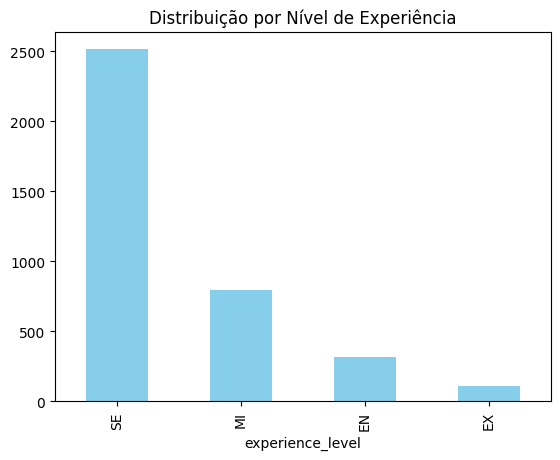

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargos mais comuns
print("Cargos mais comuns:")
print(df['job_title'].value_counts().head(10))

# 2. Distribuição por Nível de Experiência
# EN: Iniciante, MI: Intermediário, SE: Sênior, EX: Executivo
print("\nDistribuição por Experiência:")
print(df['experience_level'].value_counts())

# 3. Tamanho da Empresa (S, M, L)
print("\nDistribuição por Tamanho da Empresa:")
print(df['company_size'].value_counts())

# Gerando o primeiro gráfico para o seu trabalho
df['experience_level'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição por Nível de Experiência')
plt.show()

--- Resumo Estatístico do Salário (USD) ---
count      3735.000000
mean     137922.104953
std       63001.932966
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


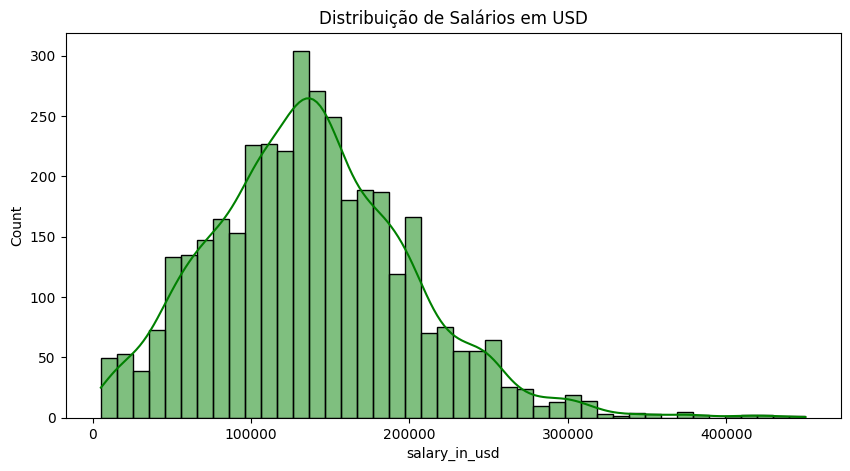

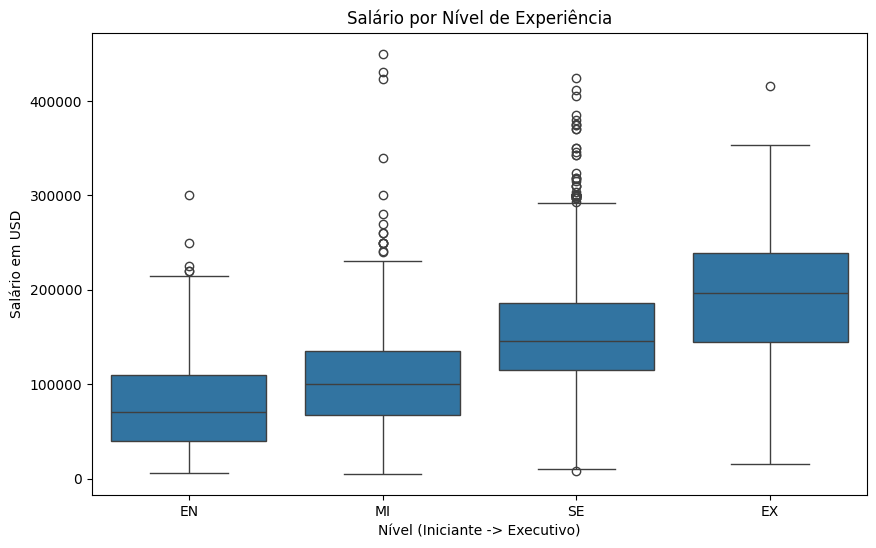

In [5]:
# 1. Medidas de Tendência Central e Dispersão (Geral)
print("--- Resumo Estatístico do Salário (USD) ---")
resumo = df['salary_in_usd'].describe()
print(resumo)

# 2. Histograma (Para ver a distribuição geral)
plt.figure(figsize=(10, 5))
sns.histplot(df['salary_in_usd'], kde=True, color='green')
plt.title('Distribuição de Salários em USD')
plt.show()

# 3. Boxplot por Nível de Experiência (Comparação por grupos)
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=['EN', 'MI', 'SE', 'EX'])
plt.title('Salário por Nível de Experiência')
plt.xlabel('Nível (Iniciante -> Executivo)')
plt.ylabel('Salário em USD')
plt.show()

--- Top 10 Países com Maiores Médias Salariais (USD) ---
country
Israel                      423834.000000
Malaysia                    200000.000000
Puerto Rico                 166000.000000
United States of America    152822.011651
Canada                      132222.905882
China                       125404.000000
New Zealand                 125000.000000
Bosnia and Herzegovina      120000.000000
Ireland                     114943.428571
Dominican Republic          110000.000000
Name: salary_in_usd, dtype: float64


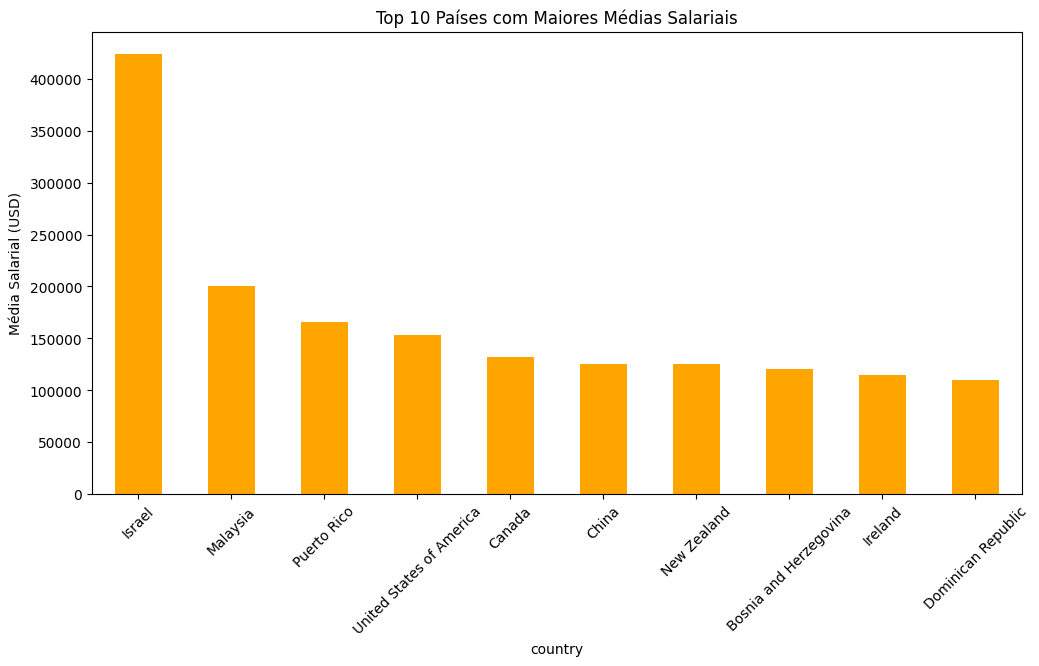

In [6]:
# 1. Calculando a média salarial por país e selecionando os 10 maiores
top_10_paises = df.groupby('country')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

print("--- Top 10 Países com Maiores Médias Salariais (USD) ---")
print(top_10_paises)

# 2. Gráfico de Barras
plt.figure(figsize=(12, 6))
top_10_paises.plot(kind='bar', color='orange')
plt.title('Top 10 Países com Maiores Médias Salariais')
plt.ylabel('Média Salarial (USD)')
plt.xticks(rotation=45) 
plt.show()

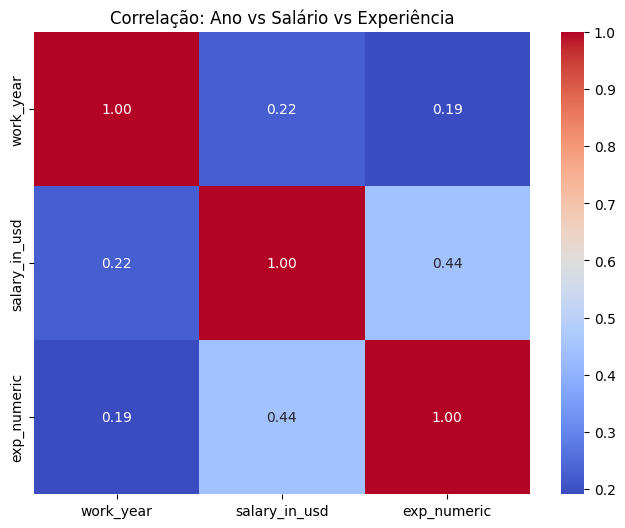

In [10]:
# 1. Garante que as colunas sejam tratadas como números, removendo erros de texto
df['work_year'] = pd.to_numeric(df['work_year'], errors='coerce')
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')

# 2. Cria o mapeamento numérico para experiência
mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df['exp_numeric'] = df['experience_level'].map(mapping)

# 3. Filtra apenas as colunas que queremos e remove linhas vazias (NaN)
colunas_quantitativas = ['work_year', 'salary_in_usd', 'exp_numeric']
df_corr = df[colunas_quantitativas].dropna()

# 4. Calcula a matriz e gera o gráfico
matriz_corr = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação: Ano vs Salário vs Experiência')
plt.show()